In [ ]:
# Xem dữ liệu

  # Xem qua
    # 5 dòng đầu: df.head()
    # 5 dòng cuối: df.tail()
    # 5 dòng bất kỳ: df.sample(5)

  # Xem cấu trúc
    # bao nhiêu dòng bao nhiêu cột: df.shape
    # tên cột: df.columns
    # kiểu dữ liệu của từng cột: df.info()

  # Xem nội dung: df.describe()

In [ ]:
# Tiền xử lý dữ liệu

  # Làm sạch
    # Có dữ liệu
      # Cấu trúc
        # Thừa cột -> lọc cột df[['a', 'b', 'c']]
        # Thừa dòng -> .drop(dòng thừa), .drop_duplicates()
        # Sai định dạng dữ liệu -> astype(...)
      # Nội dung
        # Sai -> .replace()
        # Outliers (Ngoại lai)
          # Phát hiện
            # trực tiếp
            # standard dev
            # iqr
          # Xử lý
            # bỏ -> drop()
            # tách
    # Không dữ liệu (khuyết thiếu)
      # Phát hiện -> .isna()
      # Xử lý
        # bỏ -> .dropna()
        # thay thế -> mean, median, mode; ffill, bfill; ...
        # tách riêng

  # Chuẩn hoá
    # là gì? khi nào cần chuẩn hoá? DỰ ĐOÁN, khoảng quá khác nhau
    # INCOME (TRIỆU), TUỔI (CHỤC)
    # 1. Standard Scaler -> cần phân phối chuẩn
    # 2. Min Max Scaler -> xử lý ngoại lai trước khi dùng
    # 3. Robust Scaler -> khi có ngoại lai

  # Số hoá các biến định tính
    # One hot encoding
    # Label encoding
    # Ordinal encoding

  # Rời rạc hoá các biến định lượng
    # pd.cut -> khoảng giống nhau
    # pd.qcut -> số lượng giống nhau

# Set Up

In [ ]:
# Nhập thư viện
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [ ]:
# Nhập dữ liệu
df = pd.read_csv('FoodPrice_in_Turkey.csv')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


# Xem dữ liệu

In [ ]:
# 5 dòng đầu
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [ ]:
# 5 dòng cuối
df.tail()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985
7380,Izmir,502,Cocoa (powder) - Retail,5,KG,12,2019,51.6071


In [ ]:
# 5 dòng bất kỳ
df.sample(5)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
6627,Izmir,258,Bulgur - Retail,5,KG,10,2017,3.3079
4275,Istanbul,58,Wheat flour - Retail,5,KG,1,2019,3.7832
6733,Izmir,304,Transport (public) - Retail,55,Course,8,2017,2.9504
4482,Istanbul,105,Garlic - Retail,5,KG,4,2018,15.0764
7144,Izmir,442,"Milk (powder, infant formula) - Retail",5,KG,4,2018,116.0513


In [ ]:
# bao nhiêu dòng bao nhiêu cột
df.shape

(7381, 8)

In [ ]:
# dạng từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [ ]:
# tổng quát thống kê
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


# Xử lý dữ liệu khuyết thiếu

In [ ]:
# Kiểm tra giá trị khuyết thiếu
df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


In [ ]:
# dữ liệu không bị NA

# Xử lý dữ liệu ngoại lai

<Axes: >

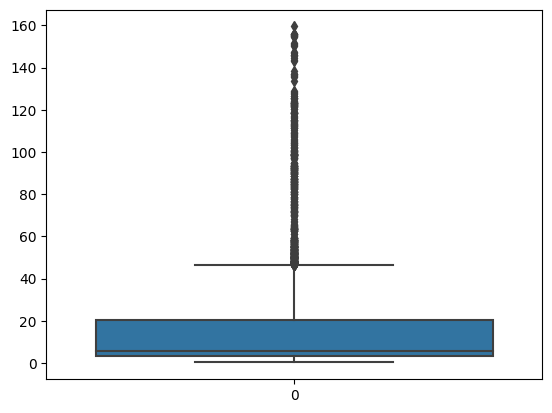

In [ ]:
# Phát hiện ngoại lai: Price
sns.boxplot(df['Price'])

<Axes: >

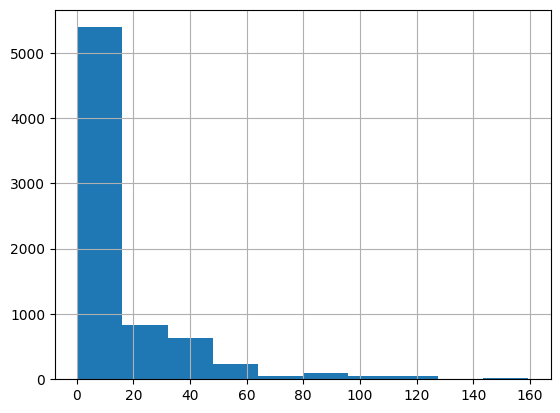

In [ ]:
df['Price'].hist()

In [ ]:
df['Price'].describe()

count    7381.000000
mean       15.738709
std        22.418284
min         0.253900
25%         3.223600
50%         5.909600
75%        20.441900
max       159.445800
Name: Price, dtype: float64

In [ ]:
# lọc ngoại lai
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
IQR

17.2183

In [ ]:
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [ ]:
outlier = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
outlier

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
888,National Average,151,Coffee - Retail,5,KG,9,2018,50.3989
889,National Average,151,Coffee - Retail,5,KG,10,2018,51.5287
890,National Average,151,Coffee - Retail,5,KG,11,2018,51.1874
891,National Average,151,Coffee - Retail,5,KG,12,2018,51.5183
892,National Average,151,Coffee - Retail,5,KG,1,2019,46.7495
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [ ]:
# tạm thời, bỏ outlier
df = df[~((df['Price'] < lower_bound) | (df['Price'] > upper_bound))]

In [ ]:
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7369,Izmir,502,Cocoa (powder) - Retail,5,KG,1,2019,44.3563
7370,Izmir,502,Cocoa (powder) - Retail,5,KG,2,2019,43.9581
7371,Izmir,502,Cocoa (powder) - Retail,5,KG,3,2019,45.2125
7372,Izmir,502,Cocoa (powder) - Retail,5,KG,4,2019,45.4075


<Axes: >

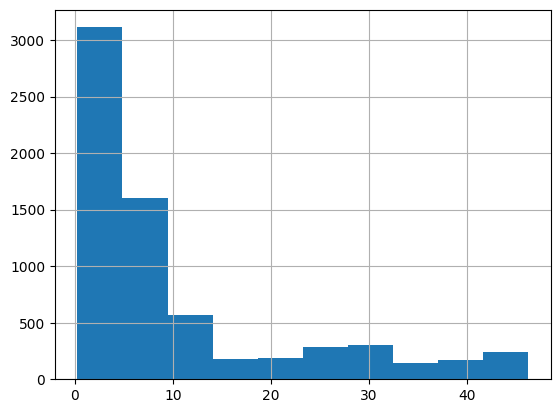

In [ ]:
df['Price'].hist()

In [ ]:
# Gom nhóm dữ liệu - Clustering: Kmeans

# Chuẩn hoá dữ liệu

In [ ]:
# Chuẩn hoá cột Price bảng df dùng cách Standard Scaler
s_scaler = StandardScaler()
df_s= s_scaler.fit_transform(df[['Price']])
df_s = pd.DataFrame(df_s, columns=['Price'])
df_s

,Price
0,-0.515550
1,-0.508123
2,-0.490294
3,-0.460519
4,-0.428256
...,...
6779,2.903171
6780,2.869022
6781,2.976598
6782,2.993321


In [ ]:
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df[['Price']])
df_s = pd.DataFrame(df_s, columns=['Price'])
df_s

,Price
0,-0.515550
1,-0.508123
2,-0.490294
3,-0.460519
4,-0.428256
...,...
6779,2.903171
6780,2.869022
6781,2.976598
6782,2.993321


# Mã hoá dữ liệu rời rạc

In [ ]:
df['ProductName'].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [ ]:
# One Hot Encoder ProductName
s = df['ProductName']
pd.get_dummies(s)

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Rời rạc hoá cột định lượng

In [ ]:
# Chia giá trị ở cột 'Price' thành 5 phần có khoảng bằng nhau
a = pd.cut(df['Price'],5,precision=2)
pd.value_counts(a)

(0.21, 9.45]      4711
(9.45, 18.65]      743
(18.65, 27.85]     474
(27.85, 37.05]     449
(37.05, 46.25]     407
Name: Price, dtype: int64

In [ ]:
# Chia giá trị ở cột 'Price' thành 5 phần có số lượng dữ liệu bằng nhau
b = pd.qcut(df['Price'],5,precision=2)
pd.value_counts(b)

(0.24, 2.69]      1358
(4.31, 6.81]      1357
(17.64, 46.25]    1357
(2.69, 4.31]      1356
(6.81, 17.64]     1356
Name: Price, dtype: int64

In [ ]:
# BTVN

# thứ 3: LÀM BÀI TẬP CỦA TIỀN XỬ LÝ DỮ LIỆU 1 (DEADLINE 12/12: 12H ĐÊM)

# thứ 7: LÀM BÀI TẬP CỦA TIỀN XỬ LÝ DỮ LIỆU 2 (DEADLINE: 16/12: 12H ĐÊM)
# 1. LÀM ĐẦY ĐỦ CÁC YÊU CẦU TRONG CÂU HỎI CỦA BÀI TẬP
# 2. VIẾT: CÓ NÊN LÀM THEO CÁCH ĐÓ KHÔNG? NẾU ĐƯỢC CHỌN, BẠN NGHĨ NÊN DÙNG PHƯƠNG PHÁP GÌ Ở CHỖ ĐÓ? VÌ SAO?